In [22]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
import hvplot.pandas
from path import Path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

In [2]:
# Load the raw_data.csv dataset.
file_path = "Resources/raw_data_cleaned2.csv"
df = pd.read_csv(file_path, index_col=0)
df.head(10)

,ContractStartDate,MaturityDate,TerminationDate,SaleDate,TerminationType,PurchasedBy,PurchasingRegion,ModelYear,TrimName,ModelName,SalesChannel,CarAccident,InspectedDamage_NotRepaired,RepairCost,Odometer,PurchasePrice,MSRP,Realized_Value
VIN_NO,,,,,,,,,,,,,,,,,,
6428,2014-09-30,2018-09-30,2018-08-31,2018-10-31,Terminated at End of Maturity,Independent Retailer,3,2001,TRIM_2,MODEL_C,H,Mild,600,500,61000,17000,41000,0.414634
6429,2014-09-30,2018-04-30,2018-02-28,2018-03-31,Terminated at End of Maturity,Independent Retailer,3,2001,TRIM_2,MODEL_C,H,No,400,400,76000,16000,40000,0.400000
6435,2014-12-31,2018-12-31,2018-11-30,2018-11-30,Terminated at End of Maturity,Independent Retailer,2,2001,TRIM_2,MODEL_C,G,No,400,0,48000,16000,43000,0.372093
6442,2014-10-31,2018-10-31,2018-05-31,2018-07-31,Terminated Prior to Maturity Date,Independent Retailer,1,2001,TRIM_2,MODEL_C,H,No,1600,400,38000,19000,41000,0.463415
6447,2015-03-31,2019-03-31,2019-04-30,2019-05-31,Terminated at End of Maturity,Independent Retailer,3,2001,TRIM_2,MODEL_C,H,No,400,500,88000,16000,36000,0.444444
6452,2015-05-31,2019-05-31,2019-04-30,2019-06-30,Terminated at End of Maturity,Independent Retailer,3,2001,TRIM_2,MODEL_C,H,No,2400,400,52000,15000,40000,0.375000
6466,2014-09-30,2018-09-30,2018-04-30,2018-09-30,Terminated Prior to Maturity Date,Independent Retailer,3,2001,TRIM_2,MODEL_C,H,No,1500,500,73000,15000,40000,0.375000
6468,2014-04-30,2018-04-30,2018-04-30,2018-08-31,Terminated at End of Maturity,Independent Retailer,3,2001,TRIM_2,MODEL_C,H,No,100,600,85000,15000,36000,0.416667
6474,2015-08-31,2018-11-30,2018-11-30,2019-01-31,Terminated at End of Maturity,Independent Retailer,2,2001,TRIM_2,MODEL_C,H,Moderate,1800,800,38000,17000,45000,0.377778


## Preprocessing 

In [3]:
df['TerminationType'].unique()
df['TerminationType'] = df['TerminationType'].replace("Terminated at End of Maturity", 1)
df['TerminationType'] = df['TerminationType'].replace("Terminated Prior to Maturity Date", 2)
df['TerminationType'] = df['TerminationType'].replace("Reposessed", 3)

In [4]:
df['PurchasedBy'].unique()
df['PurchasedBy'] = df['PurchasedBy'].replace("Independent Retailer", 1)
df['PurchasedBy'] = df['PurchasedBy'].replace("Network Retailer", 2)

In [5]:
df['TrimName'].unique()
df['TrimName'] = df['TrimName'].replace("TRIM_1", 1)
df['TrimName'] = df['TrimName'].replace("TRIM_2", 2)
df['TrimName'] = df['TrimName'].replace("TRIM_3", 3)
df['TrimName'] = df['TrimName'].replace("TRIM_4", 4)
df['TrimName'] = df['TrimName'].replace("TRIM_5", 5)
df['TrimName'] = df['TrimName'].replace("TRIM_6", 6)
df['TrimName'] = df['TrimName'].replace("TRIM_7", 7)
df['TrimName'] = df['TrimName'].replace("TRIM_8", 8)
df['TrimName'] = df['TrimName'].replace("TRIM_9", 9)
df['TrimName'] = df['TrimName'].replace("TRIM_10", 10)
df['TrimName'] = df['TrimName'].replace("TRIM_11", 11)
df['TrimName'] = df['TrimName'].replace("TRIM_12", 12)
df['TrimName'] = df['TrimName'].replace("TRIM_13", 13)
df['TrimName'] = df['TrimName'].replace("TRIM_14", 14)
df['TrimName'] = df['TrimName'].replace("TRIM_15", 15)
df['TrimName'] = df['TrimName'].replace("TRIM_16", 16)
df['TrimName'] = df['TrimName'].replace("TRIM_17", 17)
df['TrimName'] = df['TrimName'].replace("TRIM_18", 18)

In [6]:
df['ModelName'].unique()
df['ModelName'] = df['ModelName'].replace("MODEL_A", 1)
df['ModelName'] = df['ModelName'].replace("MODEL_B", 2)
df['ModelName'] = df['ModelName'].replace("MODEL_C", 3)

In [7]:
df['SalesChannel'].unique()
df['SalesChannel'] = df['SalesChannel'].replace("A", 1)
df['SalesChannel'] = df['SalesChannel'].replace("B", 2)
df['SalesChannel'] = df['SalesChannel'].replace("C", 3)
df['SalesChannel'] = df['SalesChannel'].replace("D", 4)
df['SalesChannel'] = df['SalesChannel'].replace("E", 5)
df['SalesChannel'] = df['SalesChannel'].replace("F", 6)
df['SalesChannel'] = df['SalesChannel'].replace("G", 7)
df['SalesChannel'] = df['SalesChannel'].replace("H", 8)

In [8]:
df['CarAccident'].unique()
df['CarAccident'] = df['CarAccident'].replace("No", 1)
df['CarAccident'] = df['CarAccident'].replace("Mild", 2)
df['CarAccident'] = df['CarAccident'].replace("Moderate", 3)
df['CarAccident'] = df['CarAccident'].replace("Major", 4)

## Gradient Boosting

In [9]:
# Select features
data_score = []
y = df["PurchasePrice"]
X = df.drop(["PurchasePrice","ContractStartDate","MaturityDate","TerminationDate","SaleDate"], axis=1)

In [10]:
print(X)

        TerminationType  PurchasedBy  PurchasingRegion  ModelYear  TrimName  \
VIN_NO                                                                        
6428                  1            1                 3       2001         2   
6429                  1            1                 3       2001         2   
6435                  1            1                 2       2001         2   
6442                  2            1                 1       2001         2   
6447                  1            1                 3       2001         2   
...                 ...          ...               ...        ...       ...   
17355                 1            2                 2       2000         1   
17360                 1            2                 2       2002         2   
17361                 1            2                 2       2002         2   
17362                 1            2                 2       2002         2   
17369                 2            2                

In [16]:
# Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5,random_state=1)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Choose a learning rate and create classifier
classifier = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.5,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

# Fit the model
classifier.fit(X_train_scaled, y_train)

# Make Prediction
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).head(20)

,Prediction,Actual
VIN_NO,,
15661,27000,14000
8098,14000,14000
11887,27000,19000
7446,24000,18000
1165,27000,14000
1733,27000,14000
2027,27000,16000
3475,27000,14000
9174,28000,24000


In [24]:
# Create Model
gb = GradientBoostingRegressor(min_samples_leaf= 15, min_samples_split=2, learning_rate=0.1, max_depth=4, n_estimators=100)
gb.fit(X_train,y_train)
y_gb = gb.predict(X)
# Calculate R Square
print(gb.score(X_test,y_test))
data_score.append(gb.score(X_test,y_test))

0.9976898687744559


In [25]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.05479984453944812


Classification Report
              precision    recall  f1-score   support

       10000       0.00      0.00      0.00         1
       11000       0.00      0.00      0.00        11
       12000       0.33      0.29      0.31        28
       13000       0.00      0.00      0.00        81
       14000       0.23      0.14      0.17       114
       15000       0.00      0.00      0.00       225
       16000       0.00      0.00      0.00       255
       17000       0.00      0.00      0.00       301
       18000       0.00      0.00      0.00       263
       19000       0.00      0.00      0.00       244
       20000       0.00      0.00      0.00       216
       21000       0.33      0.02      0.03       183
       22000       0.05      0.01      0.01       170
       23000       0.17      0.31      0.22       139
       24000       0.07      0.46      0.12       107
       25000       0.05      0.13      0.07        79
       26000       0.03      0.23      0.06        48
     

D:\anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [13]:
# Create Model
reg = RandomForestRegressor(n_estimators=50, random_state = 42) # determine tree count and random data count
reg.fit(X_train,y_train) 

# Calculate R Square
print("R Square Value :",reg.score(X_test,y_test))
data_score.append(reg.score(X_test,y_test))

R Square Value : 0.9982351189529284


## Decision Tree

In [14]:
# Create Model
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)

# Calculate R Square
print("R Square Value :",reg.score(X_test,y_test))
data_score.append(reg.score(X_test,y_test))

R Square Value : 0.996635778942042


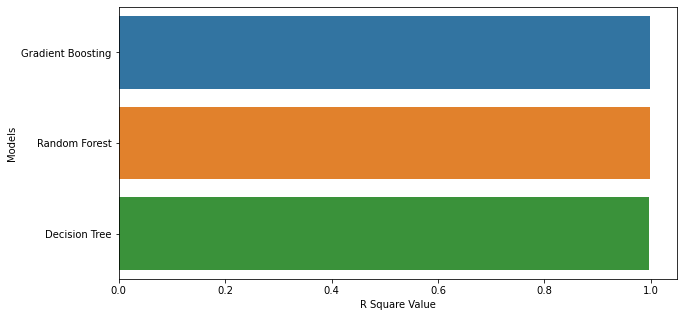

In [15]:
# Evaluate Model Performance
model_name = ['Gradient Boosting','Random Forest','Decision Tree']
plt.figure(figsize=(10,5))
sns.barplot(x=data_score,y=model_name)
plt.xlabel("R Square Value")
plt.ylabel("Models")
plt.show()